In [24]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

Driving can get boring if you are just driving in a straight line with no obstacles. To have fun, we want the most action while we drive so we need to find where there's the **most** street signs as well as most **unique** street signs. Let's read the data in and print it to see what we have.

In [25]:
signs = pd.read_csv("../assets/street_signs.csv", sep=",", header=0)
print(signs.head(10))

   _id          id mutcd_code address_number          street        city  \
0    1  1673225887       R1-1            900  California Ave  Pittsburgh   
1    2   668379452       R1-1            107     Glenbury St  Pittsburgh   
2    3   174468442       R1-1           5325      Forbes Ave  Pittsburgh   
3    4  1517107112       R1-1           1437   N St Clair St  Pittsburgh   
4    5  1374142598         WF            228     Isabella St  Pittsburgh   
5    6   283941710         WF           1010       Middle St  Pittsburgh   
6    7  1858577624         WF           1107     Sherman Ave  Pittsburgh   
7    8  1338013353         WF           1010       Middle St  Pittsburgh   
8    9   208075892         WF            500     E North Ave  Pittsburgh   
9   10   565974481       R1-1           1434   N St Clair St  Pittsburgh   

  mounting_fixture date_installed         description          neighborhood  \
0        Wood Pole            NaN                Stop  California-Kirkbride   
1    

Let's filter down to some more common street signs. We'll also look at only 18 neighborhoods instead of 92.

In [26]:
# choose specific signs and neighborhoods
specific_signs = ['Stop', 'Yield', 'No Parking Anytime', 'Do Not Enter', 'One Way', 'Pedestrian', 'Traffic Signal Ahead', 'Bike Lane']
specific_neighborhoods = ['Central Oakland', 'Stanton Heights', 'Overbrook', 'Highland Park', 'Bloomfield', 'Squirrel Hill North', 'Garfield', 'South Side Flats', 'Mount Washington', 'South Side Slopes', 'Upper Hill', 'Homewood South', 'Brookline', 'Perry North', 'Polish Hill', 'North Oakland', 'Carrick', 'Squirrel Hill South']

# filter down the data to only include the specific signs and neighborhoods
filtered_neighborhood = signs[signs['neighborhood'].isin(specific_neighborhoods)]
filtered_signs = filtered_neighborhood[filtered_neighborhood['description'].isin(specific_signs)]

Great! Now, lets take a look at which of these neighborhoods has the most street signs in general.

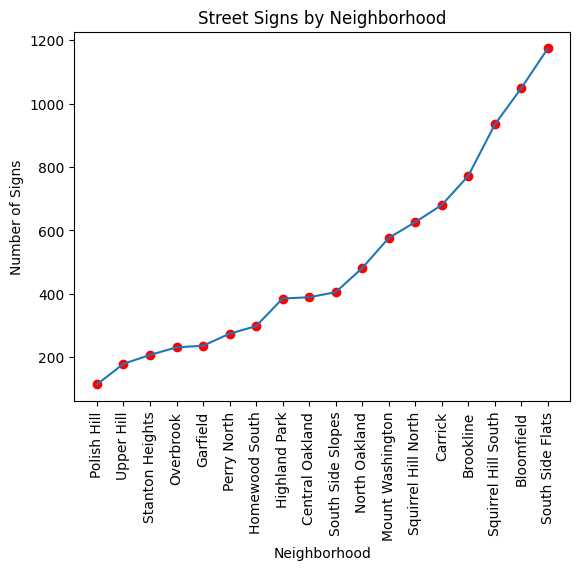

In [27]:
res = filtered_signs.groupby('neighborhood').size().sort_values(ascending=True)

# plot the data
graph = res.plot(kind='line', title="Street Signs by Neighborhood", xlabel="Neighborhood", ylabel="Number of Signs")

x_labels = res.index
graph.set_xticks(range(len(x_labels)))
graph.set_xticklabels(x_labels, rotation=90)

# add dots to the specified values
indices = res.index[:]
values = res[indices]
graph.scatter(indices, values, color='red')

We can see that the top 3 neighborhoods with the most street signs are South Side Flats, Bloomfield, and Squirrel Hill South. For a better visual, let's see what this data looks like on a map.

Text(25.222222222222214, 0.5, 'Latitude')

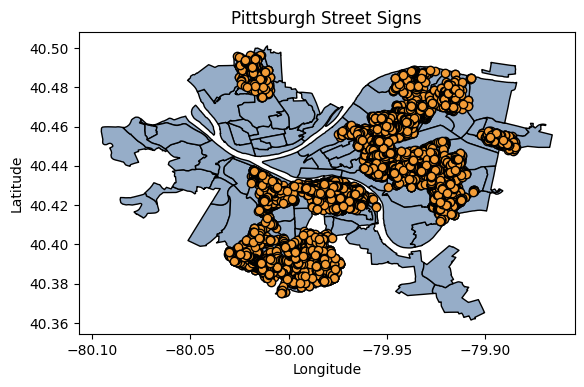

In [28]:
# read in shape files
neighborhoods = gpd.read_file('../assets/pittsburghpaneighborhoods-/Neighborhoods_.shp')

geometry = [Point(xy) for xy in zip(filtered_signs['longitude'], filtered_signs['latitude'])]
all_signs = gpd.GeoDataFrame(filtered_signs, geometry=geometry)

# plot neighborhoods
layer = neighborhoods.plot(color='#96ADC8', edgecolor='black')

# plot the signs over top
all_signs.plot(ax=layer, color='#F49D37', edgecolor='black')

plt.title('Pittsburgh Street Signs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Woahhhhhhhhh... very cluttered. Lets take a look at some specific signs to get a better understanding of the types of signs you could commonly see.

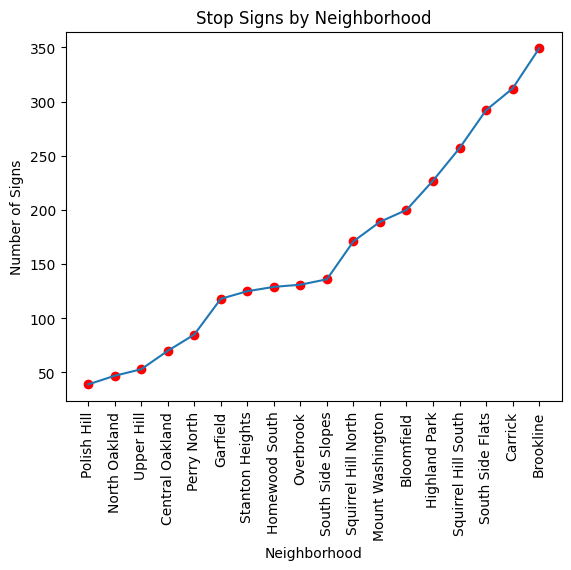

In [29]:
res = filtered_data[filtered_data['description'] == 'Stop'].groupby('neighborhood').size().sort_values(ascending=True)

# plot the data
graph = res.plot(kind='line', title="Stop Signs by Neighborhood", xlabel="Neighborhood", ylabel="Number of Signs")

x_labels = res.index
graph.set_xticks(range(len(x_labels)))
graph.set_xticklabels(x_labels, rotation=90)

# add dots to the specified values
indices = res.index[:]
values = res[indices]
graph.scatter(indices, values, color='red')

For stop signs, we can see that the top 3 neighborhoods are Brookline, Carrick, and South Side Flats. Squirrel Hill South takes a close 4th place however. Let's look at more signs.

Text(25.222222222222214, 0.5, 'Latitude')

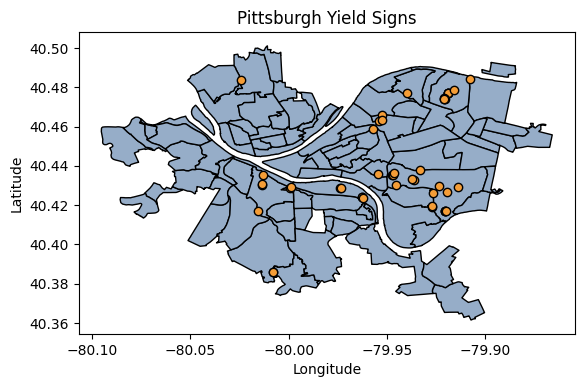

In [30]:
# plot neighborhoods
layer = neighborhoods.plot(color='#96ADC8', edgecolor='black')

yield_data = filtered_data[filtered_data['description'] == 'Yield']
yield_geo = [Point(xy) for xy in zip(yield_data['longitude'], yield_data['latitude'])]
yields = gpd.GeoDataFrame(yield_data, geometry=yield_geo)

# plot the stop signs over top
yields.plot(ax=layer, color='#F49D37', edgecolor='black')

plt.title('Pittsburgh Yield Signs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Here we can see that Squirrel Hill South has the most yield signs.

Text(25.222222222222214, 0.5, 'Latitude')

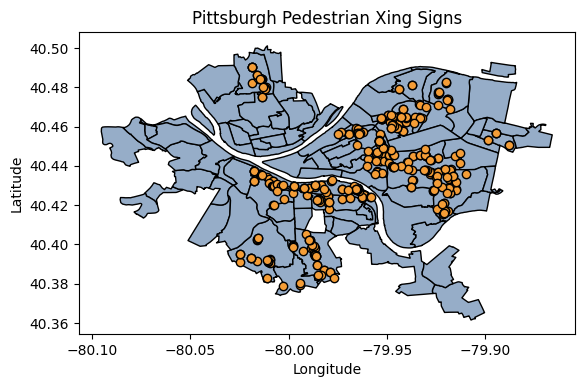

In [31]:
# plot neighborhoods
layer = neighborhoods.plot(color='#96ADC8', edgecolor='black')

ped_data = filtered_data[filtered_data['description'] == 'Pedestrian']
ped_geo = [Point(xy) for xy in zip(ped_data['longitude'], ped_data['latitude'])]
pedestrians = gpd.GeoDataFrame(ped_data, geometry=ped_geo)

# plot the stop signs over top
pedestrians.plot(ax=layer, color='#F49D37', edgecolor='black')

plt.title('Pittsburgh Pedestrian Xing Signs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Again, for pedestrian crossing signs, Squirrel Hill South takes a clear win.

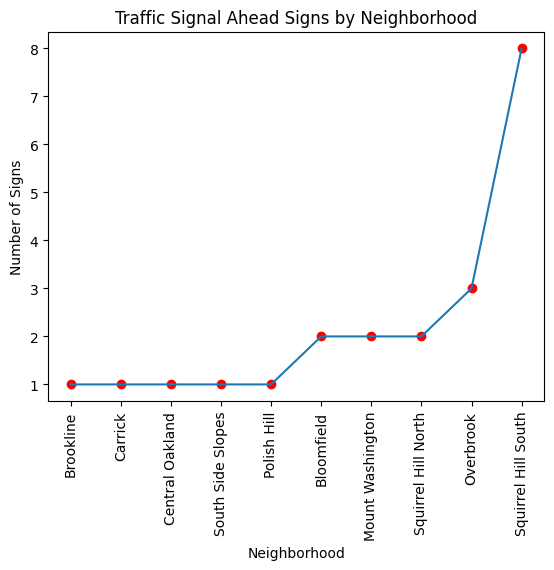

In [32]:
res = filtered_data[filtered_data['description'] == 'Traffic Signal Ahead'].groupby('neighborhood').size().sort_values(ascending=True)

# plot the data
graph = res.plot(kind='line', title="Traffic Signal Ahead Signs by Neighborhood", xlabel="Neighborhood", ylabel="Number of Signs")

x_labels = res.index
graph.set_xticks(range(len(x_labels)))
graph.set_xticklabels(x_labels, rotation=90)

# add dots to the specified values
indices = res.index[:]
values = res[indices]
graph.scatter(indices, values, color='red')

Though there are only 8, Squirrel Hill South has the most traffic signal ahead signs.

With this data, we can conclude that **Squirrel Hill South** is the modt fun neighborhood to drive in because of the challenging amount of signs it has.